In [1]:
import circularsocieties
from circularsocieties import CircularSociety

## Examples

### Example 1

Circular Society Name: S1
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 5
Approval Sets:
 Set1: [3, 5]
 Set2: [0,3] U [6, 10]
 Set3: [5, 8]
 Set4: [0,1] U [7, 10]
 Set5: [6, 9]
4
7


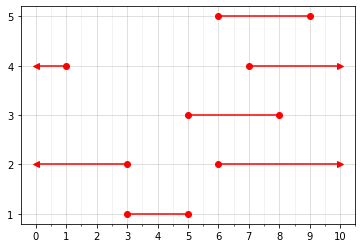

In [2]:
# Example 1  (Run this cell by pressing Shift + Enter or clicking the "play" button to the side)

# Creating a circular society named A (with a string name "S1") where the spectrum is [0, 10] (where 0 = 10)
A = CircularSociety( "S1", 10)

#   Adding sets 
A.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
A.addApprovalSet( "Set2", 0, 2 )
A.addApprovalSet( "Set3", 5, 8 )
A.addApprovalSet( "Set4", 7, 1 )
A.addApprovalSet( "Set5", 6, 9 )
A.addApprovalSet( "Set6", 2, 4 )

#  Editing an existing set
A.editApprovalSet( "Set2", 6, 3)

#  Removing a set (by its names)
A.removeApprovalSet( "Set6" )

#  Displaying the circular society's information (name, is it uniform, the spectrum, number of voters, list of approval sets) 
A.printSocietyInfo()

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
A.visualize( )

#  Checking if the set is left-right alternating (returns True or False)
A.is_LR_alt()

# Finding the agreement number of the society
a, pos = A.findAgreementNumber()
print(a)
print(pos)

### Example 2

Circular Society Name: Soc1
Spectrum: [0, 7].  (Note: we identify 0 = 7)
Number of Voters: 7
Approval Sets:
 Set 1: [0, 3.5]
 Set 2: [1, 4.5]
 Set 3: [2, 5.5]
 Set 4: [3, 6.5]
 Set 5: [0,0.5] U [4, 7]
 Set 6: [0,1.5] U [5, 7]
 Set 7: [0,2.5] U [6, 7]
(['LSet 1', 'RSet 5', 'LSet 2', 'RSet 6', 'LSet 3', 'RSet 7', 'LSet 4', 'RSet 1', 'LSet 5', 'RSet 2', 'LSet 6', 'RSet 3', 'LSet 7', 'RSet 4'], [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
Is the society left-right alternating? True
Agreement number is:  4
Location of max agreement along the horizontal axis (potentially one of several):  0


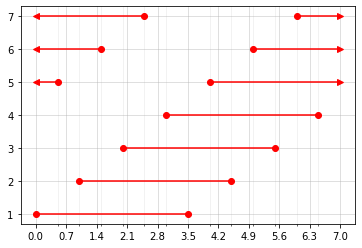

In [3]:
# Example 2 (Run this cell by pressing Shift + Enter or clicking the "play" button to the side)

# Generating a Uniform Society named S1 (with a string name "Soc1"), U(7, 4)
S1 = circularsocieties.generateUniformCircularSociety( "Soc1", 7, 4)

#  Displaying the circular society's information (name, is it uniform, the spectrum, number of voters, list of approval sets) 
S1.printSocietyInfo()

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S1.visualize( )

# Displaying the list of left/right endpoints starting from x = 0.
print(S1.listSetEndpoints())

# Checking if the set is left-right alternating (returns True or False)
print("Is the society left-right alternating?", S1.is_LR_alt() )

# Find the agreement number of this society
a, location = S1.findAgreementNumber()
print("Agreement number is: ", a)
print("Location of max agreement along the horizontal axis (potentially one of several): ", location)

### Example 3

Circular Society Name: A
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 10
Approval Sets:
 Set 1: [1.2672448750566767, 5.142017308758076]
 Set 2: [1.012580142772641, 2.6525486066313397]
 Set 3: [0,0.2763286789174091] U [5.671079711241608, 10]
 Set 4: [0,1.3347830617342749] U [6.695779483821999, 10]
 Set 5: [4.7894083832938925, 5.994872411774862]
 Set 6: [0.6108710026604036, 9.621458321427763]
 Set 7: [5.6518972091247255, 8.42532382788663]
 Set 8: [0,8.901884209183985] U [9.881913001268215, 10]
 Set 9: [1.1881518437138072, 4.104549700616079]
 Set 10: [0,6.682094440546366] U [8.313399780043314, 10]
Agreement number is:  7
Location of max agreement along the horizontal axis (potentially one of several):  1.2672448750566767


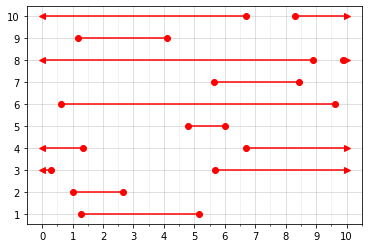

In [4]:
# Example 3: Random Society

S2 = circularsocieties.generateRandomSociety( 'A', 10, 10, epsilon = 0.5 )
S2.printSocietyInfo()
S2.visualize(  )
a2, location2 = S2.findAgreementNumber()

print("Agreement number is: ", a2)
print("Location of max agreement along the horizontal axis (potentially one of several): ", location2)

## Exploration 1: Randomly-Generated Circular Societies

Given a society whose approval sets are randomly generated (with a particular distribution), what is the distribution of the approval number of the random society?

In [5]:
# Generate R random societies, each with N voters
#   Each approval set has endpts from the uniform distribution on [0, modulo]

import numpy as np
import matplotlib.pyplot as plt

R = 100
N = 10
modulo = 10

approval = np.empty([R,])

for i in np.arange(0, R):
  S = circularsocieties.generateRandomSociety( 'A', N, modulo, epsilon = 0.5, mode = 2, a = 2, b=2 )
  approval[i], a = S.findAgreementNumber()

(array([11.,  0.,  0., 46.,  0.,  0., 35.,  0.,  0.,  8.]),
 array([0.6 , 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 ]),
 <a list of 10 Patch objects>)

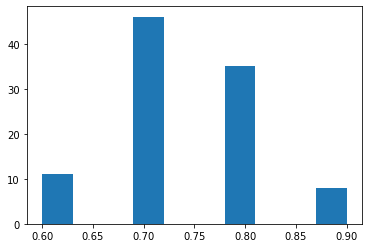

In [6]:
approvalRatio = approval/N
plt.hist(approvalRatio, bins = 10)

In [7]:
np.mean(approvalRatio)

0.74

In [8]:
S.printSocietyInfo()

Circular Society Name: A
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 10
Approval Sets:
 Set 1: [0.9616010140161724, 6.170486153513523]
 Set 2: [0.8531208796732426, 8.42308152941218]
 Set 3: [0,7.2782530898102635] U [8.834190142137526, 10]
 Set 4: [0,0.22778565208118806] U [5.351170320240062, 10]
 Set 5: [0,3.5599432449670427] U [7.654038660407942, 10]
 Set 6: [0,3.666287170612865] U [8.723237929114179, 10]
 Set 7: [6.921883957808549, 7.656189044133397]
 Set 8: [0,4.602830130662017] U [8.794301991845469, 10]
 Set 9: [0,2.739830617569371] U [8.927354090273163, 10]
 Set 10: [0,1.216002339225314] U [2.5215331668719343, 10]


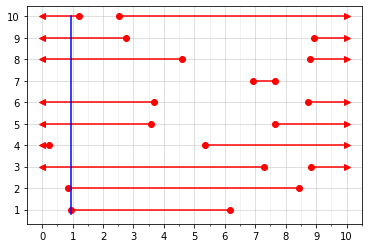

In [9]:
S.visualize( drawAgreement = True )

In [10]:
S.findAgreementNumber()

(8, 0.9616010140161724)

## Exploration 2 (mainly for checking if code was written correctly)

The ultimate goal is to obtain a bound on the change in piercing number as we transform an arbitrary circular society into a uniform one, via Hardin's transformations: (1) Elimination of containment, and (2) Left-right alternation.

### 2A: Eliminating containment (check if correct)

Below, we first check that the implementation of the method `.eliminateContainmentPair( self, smallSetName, largeSetName )` is correct.

3
4


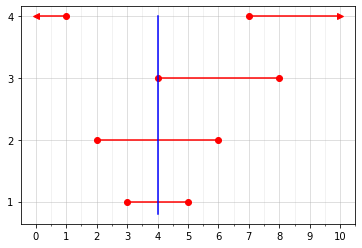

In [11]:
# Example 4: Eliminating containment

# First, create a circular society named S3 (with a string name "S3") where the spectrum is [0, 10] (where 0 = 10)
S3 = CircularSociety( "S3", 10)

#   Adding sets 
S3.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
S3.addApprovalSet( "Set2", 2, 6 )
S3.addApprovalSet( "Set3", 4, 8 )
S3.addApprovalSet( "Set4", 7, 1 )

# Finding the agreement number of the society
a3, pos3 = S3.findAgreementNumber()
print(a3)
print(pos3)

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S3.visualize( drawAgreement = True )

3
4


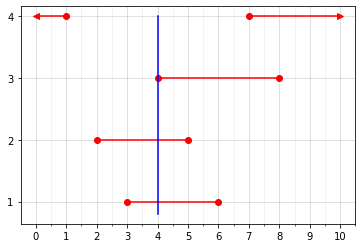

In [12]:
# Eliminate containment (Set1 is currently contained in Set2)

S3.eliminateContainmentPair( ["Set1", "Set2"] )

#  Visualizing the updated circular society
S3.visualize( drawAgreement = True )

# Finding the agreement number of the updated society
a3new, pos3new = S3.findAgreementNumber()
print(a3new)
print(pos3new)

In [13]:
# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

(False, [['Set2', 'Set1', 'Set4'], ['Set3', 'Set4', 'Set2']])


(False, [['Set3', 'Set4', 'Set2']])


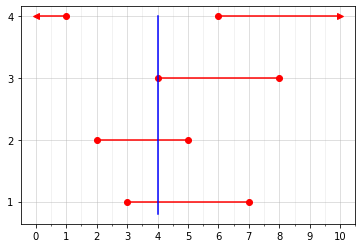

In [14]:
# Iteration 1
# Eliminate RRL in the first triple
S3.eliminateRRLTriple( LR[1][0] )
S3.visualize( drawAgreement = True )

# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

(False, [['Set1', 'Set3', 'Set2']])


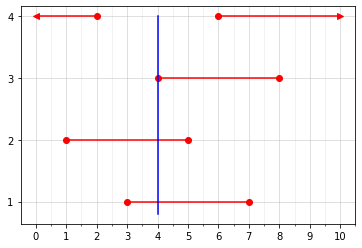

In [15]:
# Iteration 2
# Eliminate RRL in the first triple
S3.eliminateRRLTriple( LR[1][0] )
S3.visualize( drawAgreement = True )

# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

(False, [['Set3', 'Set4', 'Set1']])


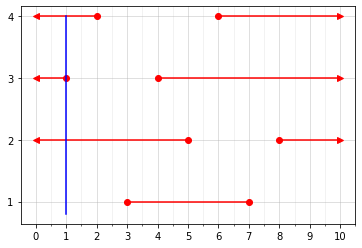

In [16]:
# Iteration 3
# Eliminate RRL in the first triple
S3.eliminateRRLTriple( LR[1][0] )
S3.visualize( drawAgreement = True )

# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

(True, [])


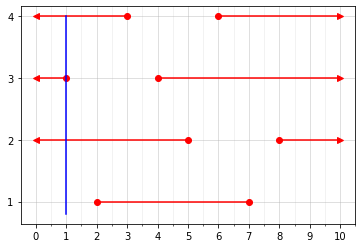

In [17]:
# Iteration 4
# Eliminate RRL in the first triple
S3.eliminateRRLTriple( LR[1][0] )
S3.visualize( drawAgreement = True )

# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

### 2B: LR-alternation (check that it's coded correctly)

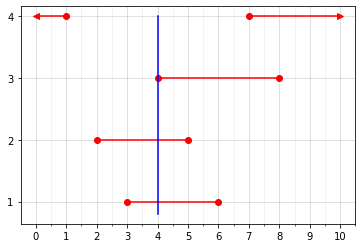

In [18]:
## ------
# Example 4 again: Eliminating containment and RRL
# Same example as above; 
#   but to test the method .eliminateRRLAll() which repeats the above iterations until society is LR-alternating

# First, create a circular society named S3 (with a string name "S3") where the spectrum is [0, 10] (where 0 = 10)
S3 = CircularSociety( "S3", 10)
#   Adding sets 
S3.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
S3.addApprovalSet( "Set2", 2, 6 )
S3.addApprovalSet( "Set3", 4, 8 )
S3.addApprovalSet( "Set4", 7, 1 )

# Eliminate containment (Set1 is currently contained in Set2)
S3.eliminateContainmentPair( ["Set1", "Set2"] )

#  Visualizing the updated circular society
S3.visualize( drawAgreement = True )

In [19]:
# Eliminate all RRL endpoints
S3.eliminateRRLAll()

# Check if LR-alternating, finding sets that attain Right-Right-Left endpoints
LR = S3.is_LR_alt( findRRL = True)
print(LR)

(True, [])


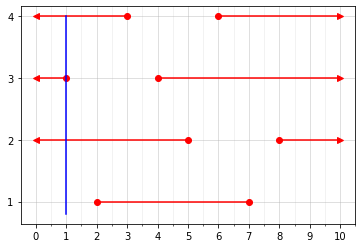

In [20]:
S3.visualize(  drawAgreement = True )

In [21]:
S3.findAgreementNumber()

(3, 1)

### 2C: Finding and visualizing piercing number of a circular society (check that it's coded correctly)


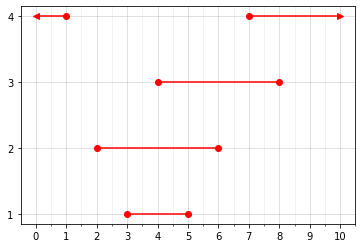

In [22]:
## ------
# Example 4 again, continued
# First, create a circular society named S3 (with a string name "S3") where the spectrum is [0, 10] (where 0 = 10)
S3 = CircularSociety( "S3", 10)

#   Adding sets 
S3.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
S3.addApprovalSet( "Set2", 2, 6 )
S3.addApprovalSet( "Set3", 4, 8 )
S3.addApprovalSet( "Set4", 7, 1 )

# Visualize
S3.visualize()

In [23]:
# finding the piercing number (and its location)
piercingNumber, piercingSet, x1, M = S3.findPiercingNumber()
print(piercingNumber)
print(piercingSet)
print(x1)
print(M)

2
[1 4]
[1. 0. 0. 1. 0. 0. 0. 0.]
[[0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1.]]


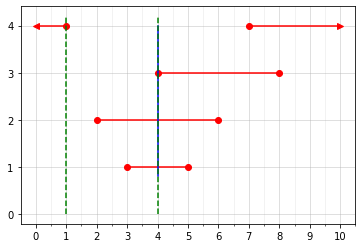

In [24]:
# Visualize the piercing set
S3.visualize( drawAgreement = True, drawPiercing = True)

### 2D: Track change in piercing number before vs. after Hardin's Transformations

2
[1 4]
[1. 0. 0. 1. 0. 0. 0. 0.]


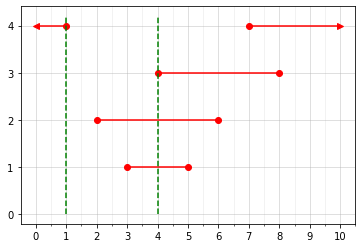

In [25]:
## ------
# Example 4 again, continued
# First, create a circular society named S3 (with a string name "S3") where the spectrum is [0, 10] (where 0 = 10)
S3 = CircularSociety( "S3", 10)

#   Adding sets 
S3.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
S3.addApprovalSet( "Set2", 2, 6 )
S3.addApprovalSet( "Set3", 4, 8 )
S3.addApprovalSet( "Set4", 7, 1 )

# Visualize
S3.visualize( drawPiercing = True)

# Find piercing number and piercing set
piercingNumber, piercingSet, x, _ = S3.findPiercingNumber()
print(piercingNumber)
print(piercingSet)
print(x)

In [26]:
# Eliminate Containment
S3.eliminateContainmentPair(["Set1", "Set2"])

In [27]:
# Make LR-Alternating (Eliminate RRL)
S3.eliminateRRLAll()

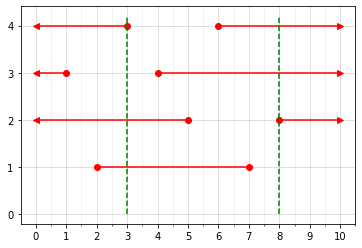

In [28]:
S3.visualize( drawPiercing = True )

In [29]:
piercingNumber2, piercingSet2, x2, Mat = S3.findPiercingNumber()
print(piercingNumber2)
print(piercingSet2)
print(x2)
print(Mat)

2
[3 8]
[0. 0. 1. 0. 0. 0. 0. 1.]
[[0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]]


Quick note: The example above shows that the linear program does not give exact solution when finding a piercing number of a circular society (although I believe it will for linear society)

(for interval graphs, which are "strongly chordal", many NP-hard problems can be solved efficiently)
https://en.wikipedia.org/wiki/Strongly_chordal_graph

So, maybe this means that for circular society, the corresponding graph doesn't have these nice properties.

other notes to self: https://en.wikipedia.org/wiki/Perfect_graph


## Exploration 3: Transforming circular societies into uniform via Hardin's Transformations (keeping track of change in piercing number)



### Carolyn's Example 

(Section 2.1 of brain dump in Overleaf)

--------
Before any transformations
Agreement number: 2
Piercing number: 3
--------
After Hardin's transformations
Agreement number after LR-alternation: 2
Piercing number after LR-alternation: 2
--------


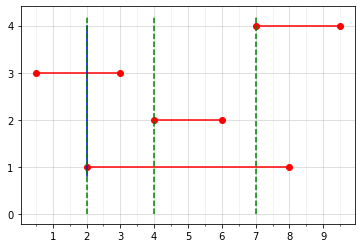

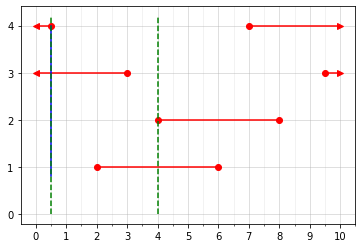

In [30]:
# Carolyn's example
S4 = CircularSociety( "CarolynsExample", 10)

#   Adding sets 
S4.addApprovalSet( "Blue", 2, 8 )  # "Blue" is the set's name, left endpoint = 2, right endpoint = 8
S4.addApprovalSet( "Red", 4, 6 )
S4.addApprovalSet( "Green", 0.5, 3 )
S4.addApprovalSet( "Purple", 7, 9.5 )

# Finding the agreement number of the society
a4, pos4 = S4.findAgreementNumber()

print("--------")
print("Before any transformations")
print("Agreement number:", a4)
p4, _, _, _ = S4.findPiercingNumber()
print("Piercing number:", p4)
S4.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

# Apply transformations
import copy

S4new = copy.deepcopy(S4)
S4new.uniformize()

print("After Hardin's transformations")
a4new, _ = S4new.findAgreementNumber()
print("Agreement number after LR-alternation:", a4new)
p4new, _, _, _ = S4new.findPiercingNumber()
print("Piercing number after LR-alternation:", p4new)
S4new.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

In [31]:
S4b = S4

S4.addApprovalSet( "Purple2", 7, 9.5 )

S4b.listApprovalSets()

 Blue: [2, 8]
 Red: [4, 6]
 Green: [0.5, 3]
 Purple: [7, 9.5]
 Purple2: [7, 9.5]


--------
Before any transformations
Agreement number: 3
Piercing number: 8
--------
After Hardin's transformations
Agreement number after LR-alternation: 8
Piercing number after LR-alternation: 2
--------


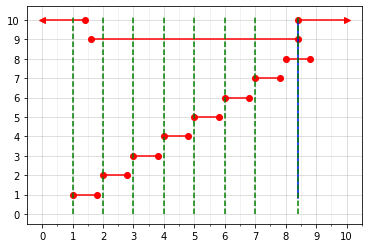

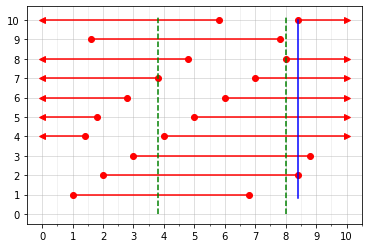

In [32]:
# Generalize Carolyn's example?
S4b = CircularSociety( "Carolyn's Example, Generalized", 10)

#   Adding sets 
S4b.addApprovalSet( "Set 1", 1, 1.8 )
S4b.addApprovalSet( "Set 2", 2, 2.8 )
S4b.addApprovalSet( "Set 3", 3, 3.8 )
S4b.addApprovalSet( "Set 4", 4, 4.8 )
S4b.addApprovalSet( "Set 5", 5, 5.8 )
S4b.addApprovalSet( "Set 6", 6, 6.8 )
S4b.addApprovalSet( "Set 7", 7, 7.8 )
S4b.addApprovalSet( "Set 8", 8, 8.8 )
S4b.addApprovalSet( "Set 9", 1.6, 8.4 )
S4b.addApprovalSet( "Set 10", 8.4, 1.4 )

# Finding the agreement number of the society
a4b, _ = S4b.findAgreementNumber()

print("--------")
print("Before any transformations")
print("Agreement number:", a4b)
p4b, _, _, _ = S4b.findPiercingNumber()
print("Piercing number:", p4b)
S4b.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

# Apply transformations
import copy

S4bnew = copy.deepcopy(S4b)
S4bnew.uniformize()

print("After Hardin's transformations")
a4bnew, _ = S4bnew.findAgreementNumber()
print("Agreement number after LR-alternation:", a4bnew)
p4bnew, _, _, _ = S4bnew.findPiercingNumber()
print("Piercing number after LR-alternation:", p4bnew)
S4bnew.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

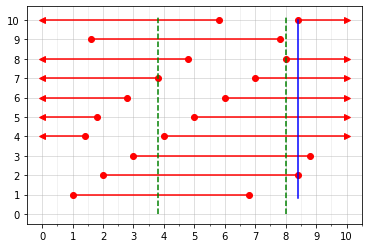

In [34]:
# saving visualizations
#f1 = plt.figure()
S4bnew.visualize(drawAgreement = True, drawPiercing = True)
#plt.plot()
plt.savefig("example_outputs/example10transformed.pdf", bbox_inches='tight')

### Randomly-generated example

In [35]:
# Generate a random circular society
S5 = circularsocieties.generateRandomSociety( "RandomSociety", 10, 10, epsilon = 0.5, mode = 1, a = 1, b = 1 )


# Finding the agreement number of the society
a5, pos5 = S5.findAgreementNumber()

print("--------")
print("Before any transformations")
print("Agreement number:", a5)
p5, _, _, _ = S5.findPiercingNumber()
print("Piercing number:", p5)
#S5.visualize( drawAgreement = True, drawPiercing = True )

# Apply transformations
S5transformed = copy.deepcopy(S5)
S5transformed.uniformize()

print("--------")
print("After Hardin's transformations")
a5new, pos5new = S5transformed.findAgreementNumber()
print("Agreement number uniformizing:", a5new)
p5new, _, _, _ = S5transformed.findPiercingNumber()
print("Piercing number after uniformizing:", p5new)
#S5.visualize( drawAgreement = True, drawPiercing = True )

--------
Before any transformations
Agreement number: 7
Piercing number: 2
--------
After Hardin's transformations
Agreement number uniformizing: 7
Piercing number after uniformizing: 2


In [36]:
# writing circular society information to text file
# --------------
import datetime

def writeSocietyInformation( circSoc, textfilename, append = True):
  # Create a local file to upload.
  if append:
    appendText = 'a'
  else:
    appendText = 'w'

  with open(textfilename, appendText ) as f:
    f.write("----------------------------------------------------\n")
    f.write("Date: " + str(datetime.datetime.now()) + "\n" )
    f.write("Circular Society Name: " + circSoc.name + "\n")
    f.write("Spectrum: [0, " + str(circSoc.modulo) + "].  (Note: we identify 0 = " + str(circSoc.modulo) + ") \n")
    f.write("Number of Voters: " + str(circSoc.numVoters) + "\n")
    f.write("Approval Sets:\n")
    for A in circSoc.approvalSets:
      if A.left_endpt <= A.right_endpt:
        f.write( " " + A.name + ": [" + str(A.left_endpt) + ", " + str(A.right_endpt) + "]\n")
      elif A.right_endpt == 0:
        f.write( " " + A.name + ": [" + str(A.left_endpt) + ", " + str(A.modulo) + "]\n")
      else:
        f.write( " " + A.name + ": [0," + str(A.right_endpt) + "] U [" + str(A.left_endpt) + ", " + str(A.modulo) + "]\n")
    #f.write("Before any transformations\n")
    a, _ = circSoc.findAgreementNumber()
    p, piercingset, _, _ = circSoc.findPiercingNumber()
    f.write("Agreement number: " + str(a) + "\n")
    f.write("Piercing number: " + str(p) + "\n")
    f.write("Piercing set: ")
    f.write(str(piercingset))
    f.write("\n")
# ----------------

In [37]:
# Create a local file to upload.
writeSocietyInformation( S5, 'example_outputs/output.txt', append = True) # to write info to file

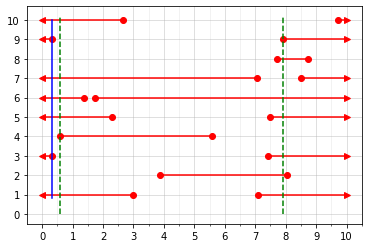

In [38]:
# saving visualizations
#f1 = plt.figure()
S5.visualize(drawAgreement = True, drawPiercing = True)
#plt.plot()
plt.savefig("example_outputs/random10.pdf", bbox_inches='tight')

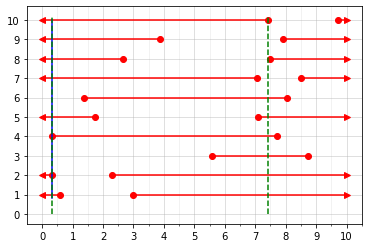

In [39]:
# saving visualizations
S5transformed.visualize(drawAgreement = True, drawPiercing = True)
plt.savefig("example_outputs/random10_transformed.pdf", bbox_inches='tight')

## Exploration 4: Experiments with randomly generated fixed length societies

--------
Before any transformations
Agreement number: 2
Piercing number: 2
--------


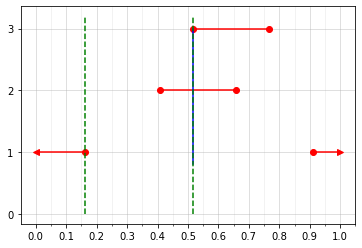

In [40]:
# ---
# Random Example
N = 3 # number of approval sets
modulo = 1 # circumference of the circular society
p = 0.25

S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )

# ---
# Finding the agreement number of the society
a, position = S.findAgreementNumber()

print("--------")
print("Before any transformations")
print("Agreement number:", a)
p, _, _, _ = S.findPiercingNumber()
print("Piercing number:", p)
S.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

In [41]:
S.printSocietyInfo()
tau, piercingset, _, _ = S.findPiercingNumber()
print(piercingset)

Circular Society Name: Fixed length society 1
Spectrum: [0, 1].  (Note: we identify 0 = 1)
Number of Voters: 3
Approval Sets:
 Set 1: [0,0.16063754513460626] U [0.9106375451346062, 1]
 Set 2: [0.4073645065597533, 0.6573645065597533]
 Set 3: [0.5155866555769678, 0.7655866555769678]
[0.16063755 0.51558666]


--------
After Hardin's transformations
Agreement number after LR-alternation: 2
Piercing number after LR-alternation: 2
--------


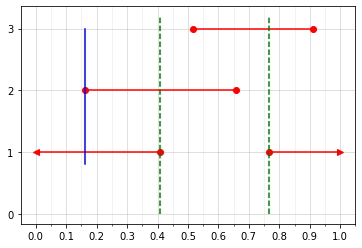

In [42]:
# Apply transformations
Snew = copy.deepcopy(S)
Snew.uniformize()

print("--------")
print("After Hardin's transformations")
anew, _ = Snew.findAgreementNumber()
print("Agreement number after LR-alternation:", anew)
pnew, _, _, _ = Snew.findPiercingNumber()
print("Piercing number after LR-alternation:", pnew)
Snew.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

## Exploration 5: Fixed-Length Experiments


Circular Society Name: S
Spectrum: [0, 1].  (Note: we identify 0 = 1)
Number of Voters: 3
Approval Sets:
 Set0: [0,0.3268] U [0.9268, 1]
 Set1: [0.3376, 0.7376]
 Set2: [0.4562, 0.8562000000000001]
Agreement Number: 2
Location of max agreement: 0.4562
Piercing Number: 2
Piercing Set: 
[0.3268 0.4562]


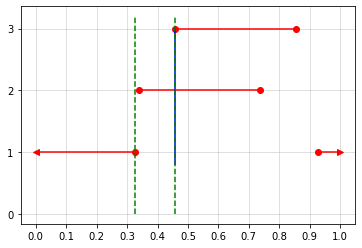

In [43]:
# Creating a circular society S, the spectrum is [0, 1]
S = CircularSociety( "S", 1)

p = 0.4 # length of the society

#   Adding sets 
left_endpoints = [0.9268, 0.3376, 0.4562]

for i, left_pt in enumerate(left_endpoints):
  S.addApprovalSet( "Set"+str(i), left_pt, (left_pt + p)%1 )

#  Displaying the circular society's information (name, is it uniform, the spectrum, number of voters, list of approval sets) 
S.printSocietyInfo()

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S.visualize( drawAgreement = True, drawPiercing = True )

#  Checking if the set is left-right alternating (returns True or False)
S.is_LR_alt()

# Finding the agreement number of the society
a, pos = S.findAgreementNumber( )
tau, piercingSet, x_value, Mat = S.findPiercingNumber()
print('Agreement Number: '+ str(a))
print('Location of max agreement: ' + str(pos))
print('Piercing Number: ' + str(tau))
print('Piercing Set: ')
print(piercingSet)

## Exploration 6: Multiple randomly-generated fixed-length societies

In [44]:
# ---
nSoc = 1000 # number of randomly-generated societies

N = 6 # number of approval sets
modulo = 1 # circumference of the circular society platform
p = 0.19
agreementNumList = np.zeros( nSoc )
piercingNumList = np.zeros( nSoc )


for i in range(0, nSoc):
  S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )
  #agreementNum, _ = S.findAgreementNumber()
  piercingNum, _, _, _ = S.findPiercingNumber()
  #agreementNumList[i] = agreementNum
  piercingNumList[i] = piercingNum

# print results & stats
print('Num sets: ', N)
print('Length: ', p)
print('Num societies: ', nSoc)
#print('Agreement Numbers: ', agreementNumList)
#print('Piercing Numbers: ', piercingNumList)

# piercing number stats
print('Piercing Numbers - Summary')
print('Min: ', np.min(piercingNumList))
print('Max: ', np.max(piercingNumList))
print('Mean: ', np.mean(piercingNumList))
print('Median: ', np.median(piercingNumList))
print('Fraction with tau = 2 :', np.sum( piercingNumList == 2) /nSoc )
print('Conjecture says: ', N*(N-1)/2*(1-2*p)*((2*p)**(N-2)) )
#print('conjecture says: ', N*(p**(N-1)) )

# test tau = 3
print('Fraction with tau = 3 :', np.sum( piercingNumList == 3) /nSoc )
print('Conjecture says: ', N*(N-1)*(N-2) /3/2 * ((1-3*p) ** 2)  * ((3*p)**(N-3)) )

# test tau = 4
print('Fraction with tau = 4 :', np.sum( piercingNumList == 4) /nSoc )
print('Conjecture says: ', N*(N-1)*(N-2)*(N-3) /4/3/2 * ((1-4*p) ** 3)  * ((4*p)**(N-4)) )

# test tau = 5
print('Fraction with tau = 5 :', np.sum( piercingNumList == 5) /nSoc )
print('Conjecture says: ', N*(N-1)*(N-2)*(N-3) * (N-2) /5/4/3/2 * ((1-5*p) ** 4)  * ((5*p)**(N-5)) )

Num sets:  6
Length:  0.19
Num societies:  1000
Piercing Numbers - Summary
Min:  1.0
Max:  5.0
Mean:  2.923
Median:  3.0
Fraction with tau = 2 : 0.189
Conjecture says:  0.193917648
Fraction with tau = 3 : 0.697
Conjecture says:  0.684843714
Fraction with tau = 4 : 0.112
Conjecture says:  0.11977113599999997
Fraction with tau = 5 : 0.001
Conjecture says:  7.125000000000025e-05


In [45]:
piercingNumList[ agreementNumList >= 5]

array([], dtype=float64)

## Exploration 7: Testing the implementation of the "linear society piercing number algorithm" on circular societies

10
9


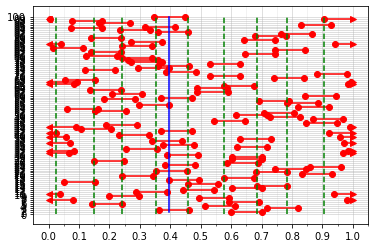

In [46]:
# Creating a circular society S, the spectrum is [0, 1]
N = 100 # number of approval sets
modulo = 1 # circumference of the circular society platform
p = 0.1 # length of the society

S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S.visualize( drawAgreement = True, drawPiercing = True )

#  use the linear piercing algorithm
output = S.piercingAlgorithm( startingPoint=0)
print(len(output))

# find the actual piercing number
p, _, _, _ = S.findPiercingNumber()
print(p)

In [47]:
#  use the linear piercing algorithm, cutting the circle at a randomly chosen location x
S.printSocietyInfo()
print('------')

import random
x = random.uniform(0, 1)
print('x : ', x)
output = S.piercingAlgorithm( startingPoint=x)
print(np.array(output))
print(len(output))

Circular Society Name: Fixed length society 1
Spectrum: [0, 1].  (Note: we identify 0 = 1)
Number of Voters: 100
Approval Sets:
 Set 1: [0.6007981188900526, 0.7007981188900526]
 Set 2: [0.36258887821470287, 0.46258887821470285]
 Set 3: [0.7192532816204296, 0.8192532816204295]
 Set 4: [0.5138955503386486, 0.6138955503386486]
 Set 5: [0.1419455618984916, 0.24194556189849162]
 Set 6: [0.5921845726114994, 0.6921845726114993]
 Set 7: [0,0.07957105905045436] U [0.9795710590504543, 1]
 Set 8: [0.49408365469299964, 0.5940836546929996]
 Set 9: [0.19714781906755952, 0.2971478190675595]
 Set 10: [0,0.03777821333841325] U [0.9377782133384133, 1]
 Set 11: [0.28849503190842873, 0.3884950319084287]
 Set 12: [0.4427823287826338, 0.5427823287826338]
 Set 13: [0.6013890753553379, 0.7013890753553379]
 Set 14: [0.6833590731779293, 0.7833590731779293]
 Set 15: [0.45769413636289114, 0.5576941363628911]
 Set 16: [0.05176596324773175, 0.15176596324773176]
 Set 17: [0.3942617596007353, 0.49426175960073526]
 Se

## Exploration 8: Multiple linear societies: check how often the linear piercing algorithm gives us the correct answer

In [48]:
nSoc = 100

# Creating a circular society S, the spectrum is [0, 1]
N = 100 # number of approval sets
modulo = 1 # circumference of the circular society platform
p = 0.3 # length of the society
tau_diff_list = np.zeros( nSoc ) # tau minus tau_actual

for i in range(0, nSoc):
  S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )
  #  use the linear piercing algorithm
  output = S.piercingAlgorithm( startingPoint=0)
  tau = len(output)
  # find the actual piercing number
  tau_actual, _, _, _ = S.findPiercingNumber()
  tau_diff_list[i] = tau - tau_actual

min_tau_diff = min(tau_diff_list)
max_tau_diff = max(tau_diff_list)
num_correct = len( tau_diff_list[tau_diff_list == 0] )
frac_correct = num_correct / nSoc

print('Minimum difference: ', min_tau_diff )
print('Maximum difference: ', max_tau_diff )
print('Fraction correct :', frac_correct )

Minimum difference:  0.0
Maximum difference:  1.0
Fraction correct : 0.95


## Exploration 9: Checking (k, m)-agreeability

1
[]


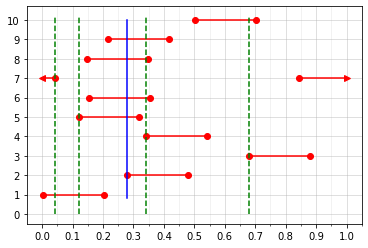

In [49]:
# Creating a circular society S, the spectrum is [0, 1]
N = 10 # number of approval sets
modulo = 1 # circumference of the circular society platform
p = 0.2 # length of the society

S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S.visualize( drawAgreement = True, drawPiercing = True )

is_kmagreeable, bad_m_sets = S.checkAgreeability(4, 9)
print(is_kmagreeable)
print(bad_m_sets)

In [50]:
is_kmagreeable, bad_m_sets = S.checkAgreeability(2, 3)
print(is_kmagreeable)
print(bad_m_sets)

0
[['Set 1', 'Set 2', 'Set 3'], ['Set 1', 'Set 2', 'Set 10'], ['Set 1', 'Set 3', 'Set 4'], ['Set 1', 'Set 3', 'Set 9'], ['Set 1', 'Set 9', 'Set 10'], ['Set 2', 'Set 7', 'Set 10'], ['Set 3', 'Set 4', 'Set 5'], ['Set 4', 'Set 5', 'Set 7'], ['Set 5', 'Set 7', 'Set 10'], ['Set 6', 'Set 7', 'Set 10'], ['Set 7', 'Set 8', 'Set 10'], ['Set 7', 'Set 9', 'Set 10']]
